In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-world-smartphones-dataset/smartphones.csv


In [3]:
import pandas as pd
df=pd.read_csv("/kaggle/input/real-world-smartphones-dataset/smartphones.csv")

In [4]:
df.sample(5)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
322,oppo,Oppo A12,9990,6.4,0,helio,8.0,1.8,4230.0,0,...,32,6.22,60,2,android,13.0,5.0,1,720,1520
799,vivo,Vivo Y100,29990,8.2,1,dimensity,8.0,2.4,5000.0,1,...,128,6.00,120,3,android,50.0,50.0,0,2400,1080
473,realme,Realme 8s 5G (8GB RAM + 128GB),17499,8.2,1,dimensity,8.0,2.4,5000.0,1,...,128,6.50,90,3,android,64.0,16.0,1,2400,1080
779,vivo,Vivo V28,28990,8.4,1,snapdragon,8.0,2.2,5000.0,1,...,256,6.70,120,3,android,108.0,32.0,1,2400,1080
902,xiaomi,Xiaomi Redmi 9A (6GB RAM + 128GB),10990,6.9,0,helio,8.0,2.0,5000.0,0,...,128,6.53,60,1,android,13.0,5.0,1,1600,720


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [6]:
df.shape

(980, 22)

In [7]:
df.describe()


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [8]:
average = df['price'].mean()
print(average)

32520.504081632655


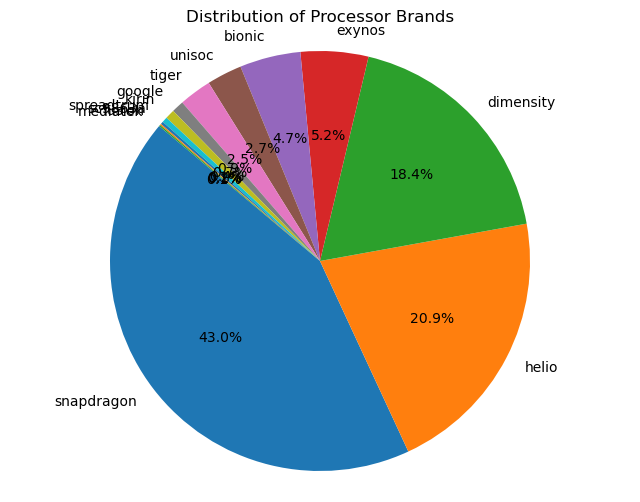

In [9]:
brand_counts = df['processor_brand'].value_counts()
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)


# Add a title
plt.title('Distribution of Processor Brands')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [10]:
unique_values = df['refresh_rate'].unique()
print(unique_values)

[ 60 120 144 165  90 240]


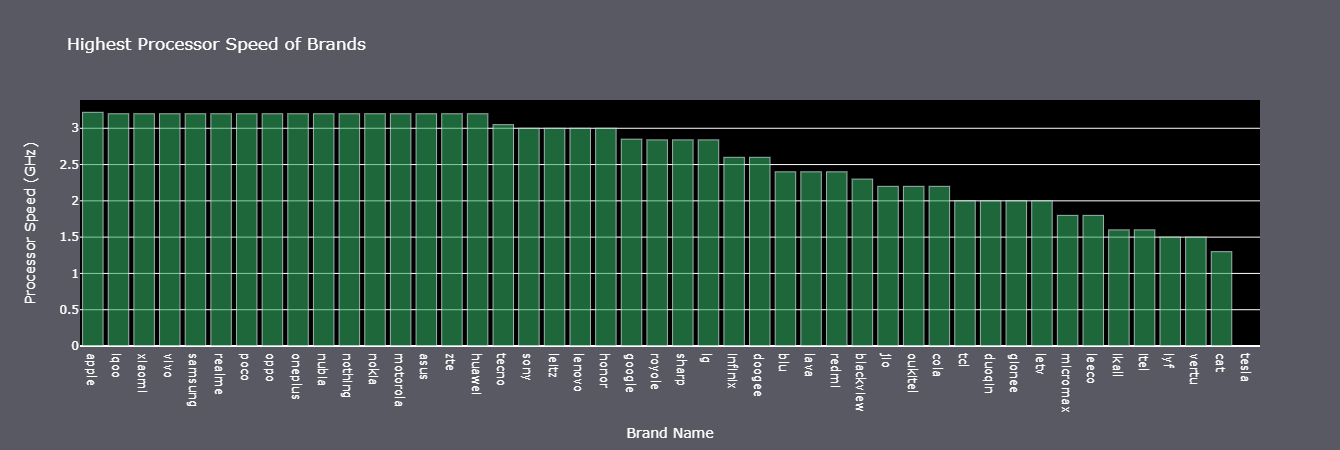

In [11]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

# Group by brand and find the maximum processor speed
max_processor_speed_by_brand = df.groupby('brand_name')['processor_speed'].max().reset_index()

# Sort the data by processor speed in descending order
max_processor_speed_by_brand = max_processor_speed_by_brand.sort_values(by='processor_speed', ascending=False)

# Create the bar graph using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_processor_speed_by_brand['brand_name'],
    y=max_processor_speed_by_brand['processor_speed'],
    marker_color='rgba(50, 171, 96, 0.6)',  # Adjust color as needed
))

# Update the layout for better aesthetics
fig.update_layout(
    title='Highest Processor Speed of Brands',
    xaxis_title='Brand Name',
    yaxis_title='Processor Speed (GHz)',
    plot_bgcolor='black',
    paper_bgcolor='#595964',
    font=dict(color='white')
)

# Initialize notebook mode and display the interactive plot
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

/tmp/ipykernel_32/545467485.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



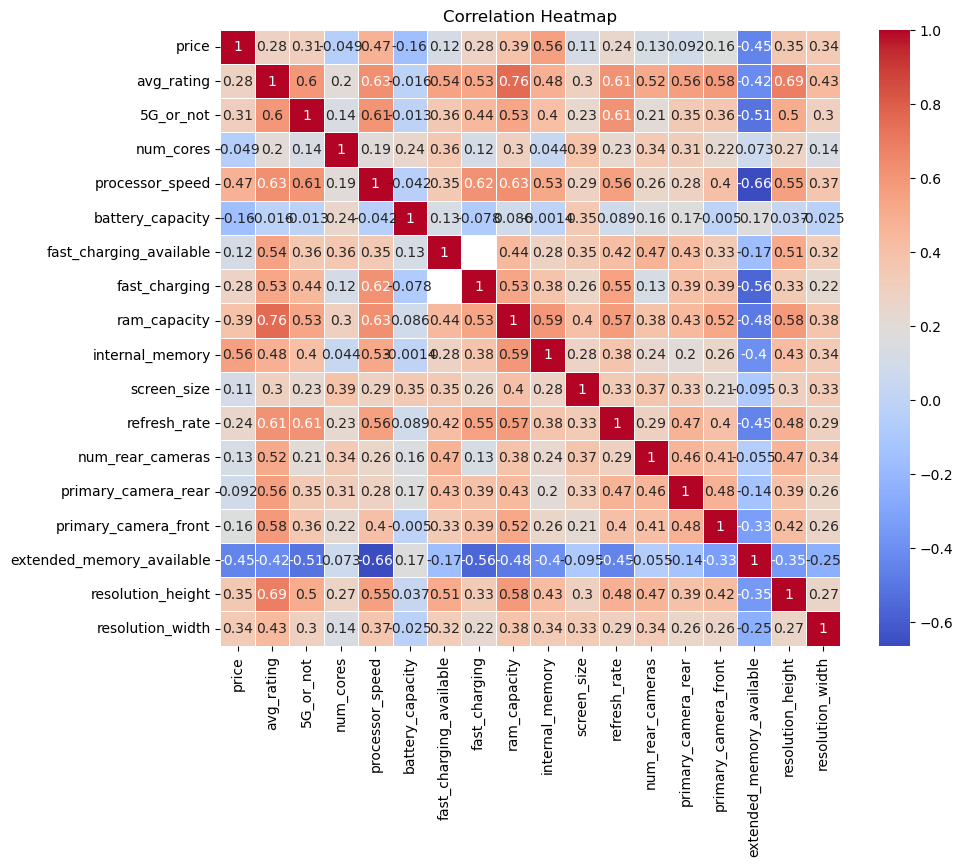

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [13]:
correlation_matrix = df.corr()

# Find columns with the highest correlation values
threshold = 0.6  # Set your correlation threshold
high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1.0)
high_correlation_cols = [column for column in high_correlation_pairs.columns if any(high_correlation_pairs[column])]

# Display the list of columns with high correlations
print("Columns with High Correlations:")
print(high_correlation_cols)

Columns with High Correlations:
['avg_rating', '5G_or_not', 'processor_speed', 'fast_charging', 'ram_capacity', 'refresh_rate', 'extended_memory_available', 'resolution_height']


/tmp/ipykernel_32/1293391284.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



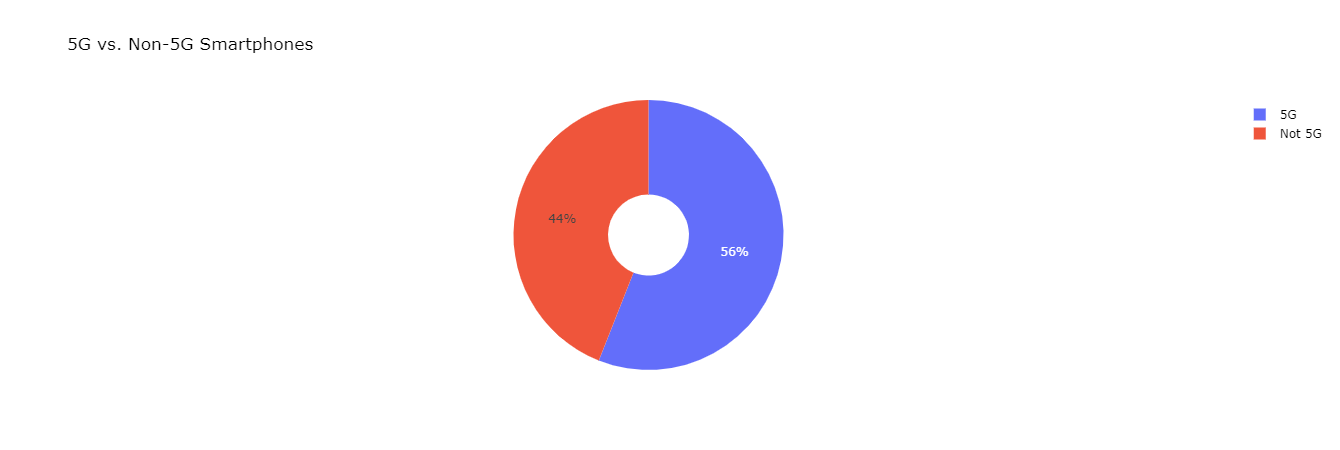

In [14]:
count_5g = df['5G_or_not'].value_counts()

labels = ['5G', 'Not 5G']
values = count_5g.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

fig.update_layout(title='5G vs. Non-5G Smartphones',
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  font=dict(color='black'))

fig.show()

['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'xiaomi' 'zte']


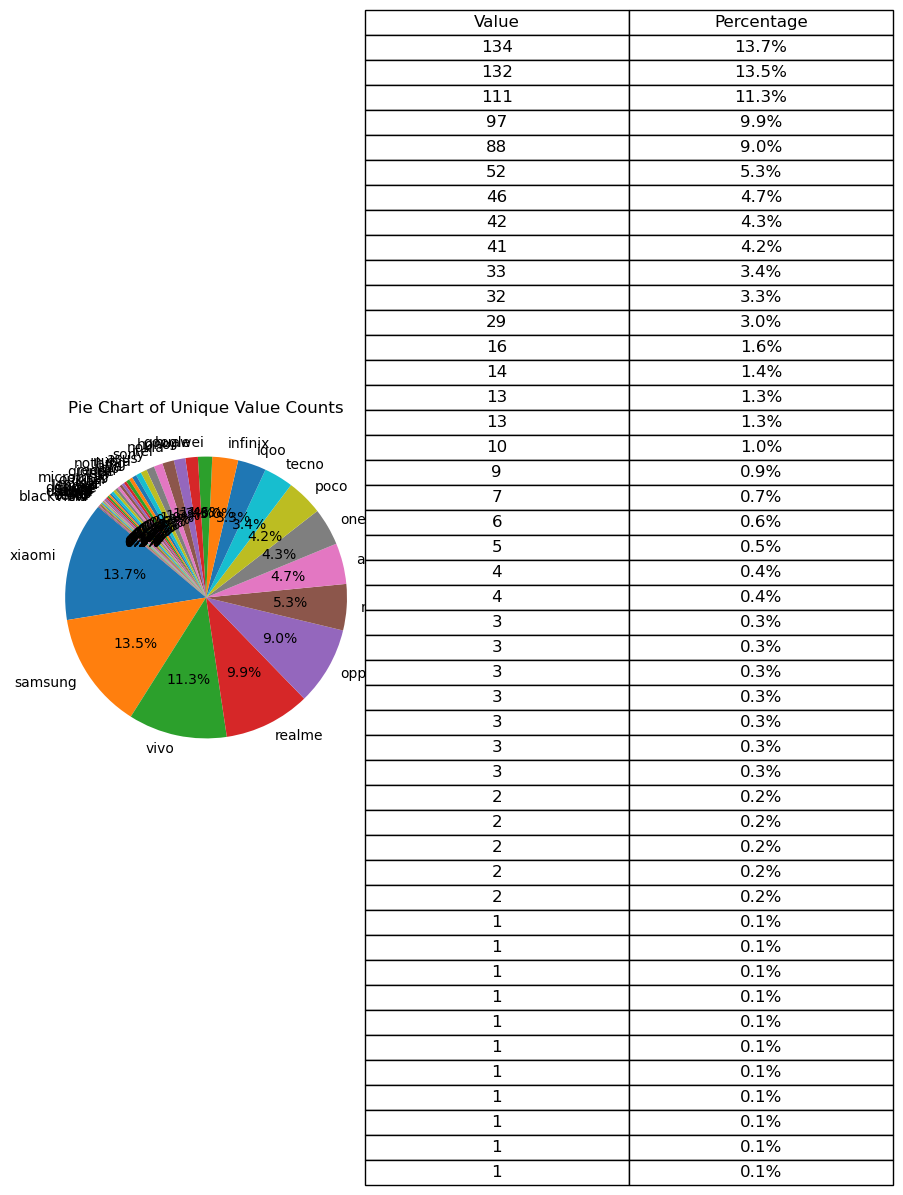

In [22]:
unique_entries = df['brand_name'].unique()

print(unique_entries)
value_counts = df['brand_name'].value_counts()

# Calculate percentage values
total_values = len(df)
percentage_values = (value_counts / total_values) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Create a 1x2 grid of subplots, plot the pie chart on the first one
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Unique Value Counts')

# Creating a table
cell_text = []
for val, percent in zip(value_counts, percentage_values):
    cell_text.append([val, f'{percent:.1f}%'])

columns = ['Value', 'Percentage']
plt.subplot(1, 2, 2)  # Plot the table on the second subplot
table = plt.table(cellText=[columns] + cell_text,
                  colLabels=None,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)
plt.axis('off')  # Turn off axis for the table subplot

plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')

# Select relevant features
features = data[['price', 'avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'internal_memory', 'screen_size']]

# Handle missing values (fill NaN with mean of each column)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
train_data, test_data = train_test_split(features_imputed, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Build a Nearest Neighbors model
n_neighbors = 5  # You can adjust this parameter
model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
model.fit(train_data_scaled)

# Rest of the code remains unchanged...


# Function to recommend phones based on user preferences
def recommend_phone(price, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size):
    user_preferences = [[price, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size]]
    user_preferences_scaled = scaler.transform(user_preferences)
    
    distances, indices = model.kneighbors(user_preferences_scaled)
    
    recommended_indices = indices.flatten()
    recommended_phones = data.iloc[recommended_indices]['model']
    
    return recommended_phones

# Example user preferences
user_price = 800
user_avg_rating = 4.5
user_num_cores = 8
user_processor_speed = 2.0
user_battery_capacity = 4000
user_internal_memory = 128
user_screen_size = 6.5

recommended_phones = recommend_phone(user_price, user_avg_rating, user_num_cores, user_processor_speed, user_battery_capacity, user_internal_memory, user_screen_size)

print("Recommended phones:")
print(recommended_phones)


Recommended phones:
234    Motorola Moto G51 5G
519        Realme GT Neo 3T
616      Samsung Galaxy F22
377        Oppo Find X6 Pro
194             Letv Y2 Pro
Name: model, dtype: object


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')

# Select relevant features
features = data[['price', 'avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'internal_memory', 'screen_size']]

# Handle missing values (fill NaN with mean of each column)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
train_data, test_data = train_test_split(features_imputed, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Build a Nearest Neighbors model
n_neighbors = 5  # You can adjust this parameter
model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
model.fit(train_data_scaled)

# Function to recommend phones based on user preferences
def recommend_phone(price_range, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size):
    user_preferences = [[price_range, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size]]
    user_preferences_scaled = scaler.transform(user_preferences)
    
    distances, indices = model.kneighbors(user_preferences_scaled)
    
    recommended_indices = indices.flatten()
    recommended_phones = data.iloc[recommended_indices]['model']
    
    return recommended_phones

# Example user preferences
user_lower_price = float(input("Enter lower price range: "))
user_upper_price = float(input("Enter upper price range: "))
user_avg_rating = 4.5
user_num_cores = 8
user_processor_speed = 2.0
user_battery_capacity = 4000
user_internal_memory = 128
user_screen_size = 6.5

recommended_phones = recommend_phone(user_upper_price, user_avg_rating, user_num_cores, user_processor_speed, user_battery_capacity, user_internal_memory, user_screen_size)

print("Recommended phones:")
print(recommended_phones)


Enter lower price range:  10000
Enter upper price range:  40000


Recommended phones:
234    Motorola Moto G51 5G
519        Realme GT Neo 3T
616      Samsung Galaxy F22
194             Letv Y2 Pro
377        Oppo Find X6 Pro
Name: model, dtype: object


# ON THE BASIS OF PRICE RANGE

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')

# Select relevant features
features = data[['price', 'avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'internal_memory', 'screen_size']]

# Handle missing values (fill NaN with mean of each column)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
train_data, test_data = train_test_split(features_imputed, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Build a Nearest Neighbors model
n_neighbors = 5  # You can adjust this parameter
model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
model.fit(train_data_scaled)

# Function to recommend phones based on user preferences
def recommend_phone(price_range, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size):
    user_preferences = [[price_range, avg_rating, num_cores, processor_speed, battery_capacity, internal_memory, screen_size]]
    user_preferences_scaled = scaler.transform(user_preferences)
    
    distances, indices = model.kneighbors(user_preferences_scaled)
    
    recommended_indices = indices.flatten()
    recommended_phones = data.iloc[recommended_indices]
    
    return recommended_phones

# Example user preferences
user_lower_price = float(input("Enter lower price range: "))
user_upper_price = float(input("Enter upper price range: "))
user_avg_rating = 4.5
user_num_cores = 8
user_processor_speed = 2.0
user_battery_capacity = 4000
user_internal_memory = 128
user_screen_size = 6.5

recommended_phones = recommend_phone(user_upper_price, user_avg_rating, user_num_cores, user_processor_speed, user_battery_capacity, user_internal_memory, user_screen_size)

print("Recommended phones:")
print(recommended_phones)


Enter lower price range:  15000
Enter upper price range:  70000


Recommended phones:
    brand_name                 model  price  avg_rating  5G_or_not  \
412       poco              POCO C31   6499         6.5          0   
234   motorola  Motorola Moto G51 5G  12999         7.7          1   
519     realme      Realme GT Neo 3T  24999         7.9          1   
616    samsung    Samsung Galaxy F22  11499         7.3          0   
183        jio           Jio Phone 3   4499         NaN          0   

    processor_brand  num_cores  processor_speed  battery_capacity  \
412           helio        8.0              2.3            5000.0   
234      snapdragon        8.0              2.2            5000.0   
519      snapdragon        8.0              3.2            5000.0   
616           helio        8.0              2.0            6000.0   
183             NaN        4.0              1.4            2800.0   

     fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
412                        0  ...               32         6.53

# ON THE BASIS OF SPECIALITY

In [37]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')

# Define a mapping of brands to specialties
brand_specialties = {
    'apple': 'photography',
    'asus': 'gaming',
    'blackview': 'rugged',
    'blu': 'budget',
    'cat': 'rugged',
    'cola': 'unique',
    'doogee': 'rugged',
    'duoqin': 'budget',
    'gionee': 'budget',
    'google': 'photography',
    'honor': 'balanced',
    'huawei': 'balanced',
    'ikall': 'budget',
    'infinix': 'budget',
    'iqoo': 'performance',
    'itel': 'budget',
    'jio': 'budget',
    'lava': 'budget',
    'leeco': 'balanced',
    'leitz': 'balanced',
    'lenovo': 'balanced',
    'letv': 'balanced',
    'lg': 'balanced',
    'lyf': 'budget',
    'micromax': 'budget',
    'motorola': 'balanced',
    'nokia': 'balanced',
    'nothing': 'unique',
    'nubia': 'gaming',
    'oneplus': 'performance',
    'oppo': 'camera',
    'oukitel': 'rugged',
    'poco': 'performance',
    'realme': 'budget',
    'redmi': 'budget',
    'royole': 'unique',
    'samsung': 'balanced',
    'sharp': 'unique',
    'sony': 'camera',
    'tcl': 'budget',
    'tecno': 'budget',
    'tesla': 'unique',
    'vertu': 'luxury',
    'vivo': 'camera',
    'xiaomi': 'budget',
    'zte': 'budget'
}

# Add 'specialty' column to the DataFrame
data['specialty'] = data['brand_name'].map(brand_specialties)

# Create dropdown widget for brand specialties
brand_specialty_dropdown = widgets.Dropdown(
    options=brand_specialties.values(),
    description='Select Brand Specialty:',
)

# Display the dropdown widget
display(brand_specialty_dropdown)

# Function to recommend phones based on brand specialty
def recommend_phone(specialty):
    recommended_phones = data[data['specialty'] == specialty]
    return recommended_phones

# Get the selected specialty from the dropdown
selected_specialty = brand_specialty_dropdown.value

# Recommend phones based on the selected specialty
recommended_phones = recommend_phone(selected_specialty)

print("Recommended phones:")
print(recommended_phones)


Dropdown(description='Select Brand Specialty:', options=('photography', 'gaming', 'rugged', 'budget', 'rugged'…

Recommended phones:
   brand_name                                  model   price  avg_rating  \
0       apple                        Apple iPhone 11   38999         7.3   
1       apple                Apple iPhone 11 (128GB)   46999         7.5   
2       apple                Apple iPhone 11 Pro Max  109900         7.7   
3       apple                        Apple iPhone 12   51999         7.4   
4       apple                Apple iPhone 12 (128GB)   55999         7.5   
5       apple                Apple iPhone 12 (256GB)   67999         7.6   
6       apple                   Apple iPhone 12 Mini   40999         7.4   
7       apple           Apple iPhone 12 Mini (128GB)   45999         7.5   
8       apple           Apple iPhone 12 Mini (256GB)   55999         7.5   
9       apple            Apple iPhone 12 Pro (256GB)  119900         8.0   
10      apple            Apple iPhone 12 Pro (512GB)  139900         8.0   
11      apple                        Apple iPhone 13   62999        